In [153]:
%%capture
%run Final_Df.ipynb

In [263]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression as lr
import statsmodels.api as sm
from matplotlib import pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression



In [237]:
df = get_dataframe()

In [156]:
print(df.columns)
print(df)

Index(['DATE', 'avalanche_sum', 'PRCP', 'SNWD', 'TMAX', 'TMIN', 'MONTH_1',
       'MONTH_10', 'MONTH_11', 'MONTH_12', 'MONTH_2', 'MONTH_3', 'MONTH_4',
       'MONTH_5', 'MONTH_6', 'MONTH_7', 'MONTH_8', 'MONTH_9', 'snow_diff_day',
       'snow_diff_week', 'got_snow', 'min_below_freezing',
       'max_above_freezing', 'min*max', 'avalanche_binary', 'Region_Ogden',
       'Region_Provo', 'Region_Salt Lake', 'Region_Uintas'],
      dtype='object')
            DATE  avalanche_sum  PRCP  SNWD  TMAX  TMIN  MONTH_1  MONTH_10  \
3519  2010-01-03            1.0  0.00  38.0  31.0  11.0        1         0   
3520  2010-01-04            0.0  0.00  37.0  35.0  14.0        1         0   
3523  2010-01-07            4.0  0.17  42.0  25.0   7.0        1         0   
3527  2010-01-08            1.0  0.00  41.0  35.0  10.0        1         0   
3533  2010-01-12            0.0  0.00  37.0  42.0  29.0        1         0   
...          ...            ...   ...   ...   ...   ...      ...       ...   
68660 

In [61]:
def linear_regress():
    months = [
       'MONTH_1', 'MONTH_2', 'MONTH_3', 'MONTH_4',
       'MONTH_5', 'MONTH_7', 'MONTH_8', 'MONTH_9',
       'MONTH_10', 'MONTH_11', 'MONTH_12', ]
    y = df['avalanche_binary']
    X = df[['snow_diff_week', 'min*max']]
    X = df[months]
    regress = sm.OLS(y,X).fit()
    print(regress.summary())
    
    

In [62]:
linear_regress()

                                 OLS Regression Results                                
Dep. Variable:       avalanche_binary   R-squared (uncentered):               -2155.452
Model:                            OLS   Adj. R-squared (uncentered):          -2156.414
Method:                 Least Squares   F-statistic:                             -2243.
Date:                Tue, 16 Nov 2021   Prob (F-statistic):                        1.00
Time:                        16:44:28   Log-Likelihood:                         -4936.7
No. Observations:               24692   AIC:                                      9895.
Df Residuals:                   24681   BIC:                                      9985.
Df Model:                          11                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [181]:
def plots():
    avalanches = df["avalanche_sum"]
    precipitation = df["PRCP"]
    fig = plt.figure(figsize=(20,20))
    plt.hist(avalanches, bins=[1,2,3,5,10,20])
    plt.title("Number of Avalanches Per Day", size=20)
    plt.xlabel("Avalanches", size=20)
    plt.ylabel("Days", size=20)
    plt.xticks(fontsize=20)
    plt.yticks(fontsize=20)
    plt.show()

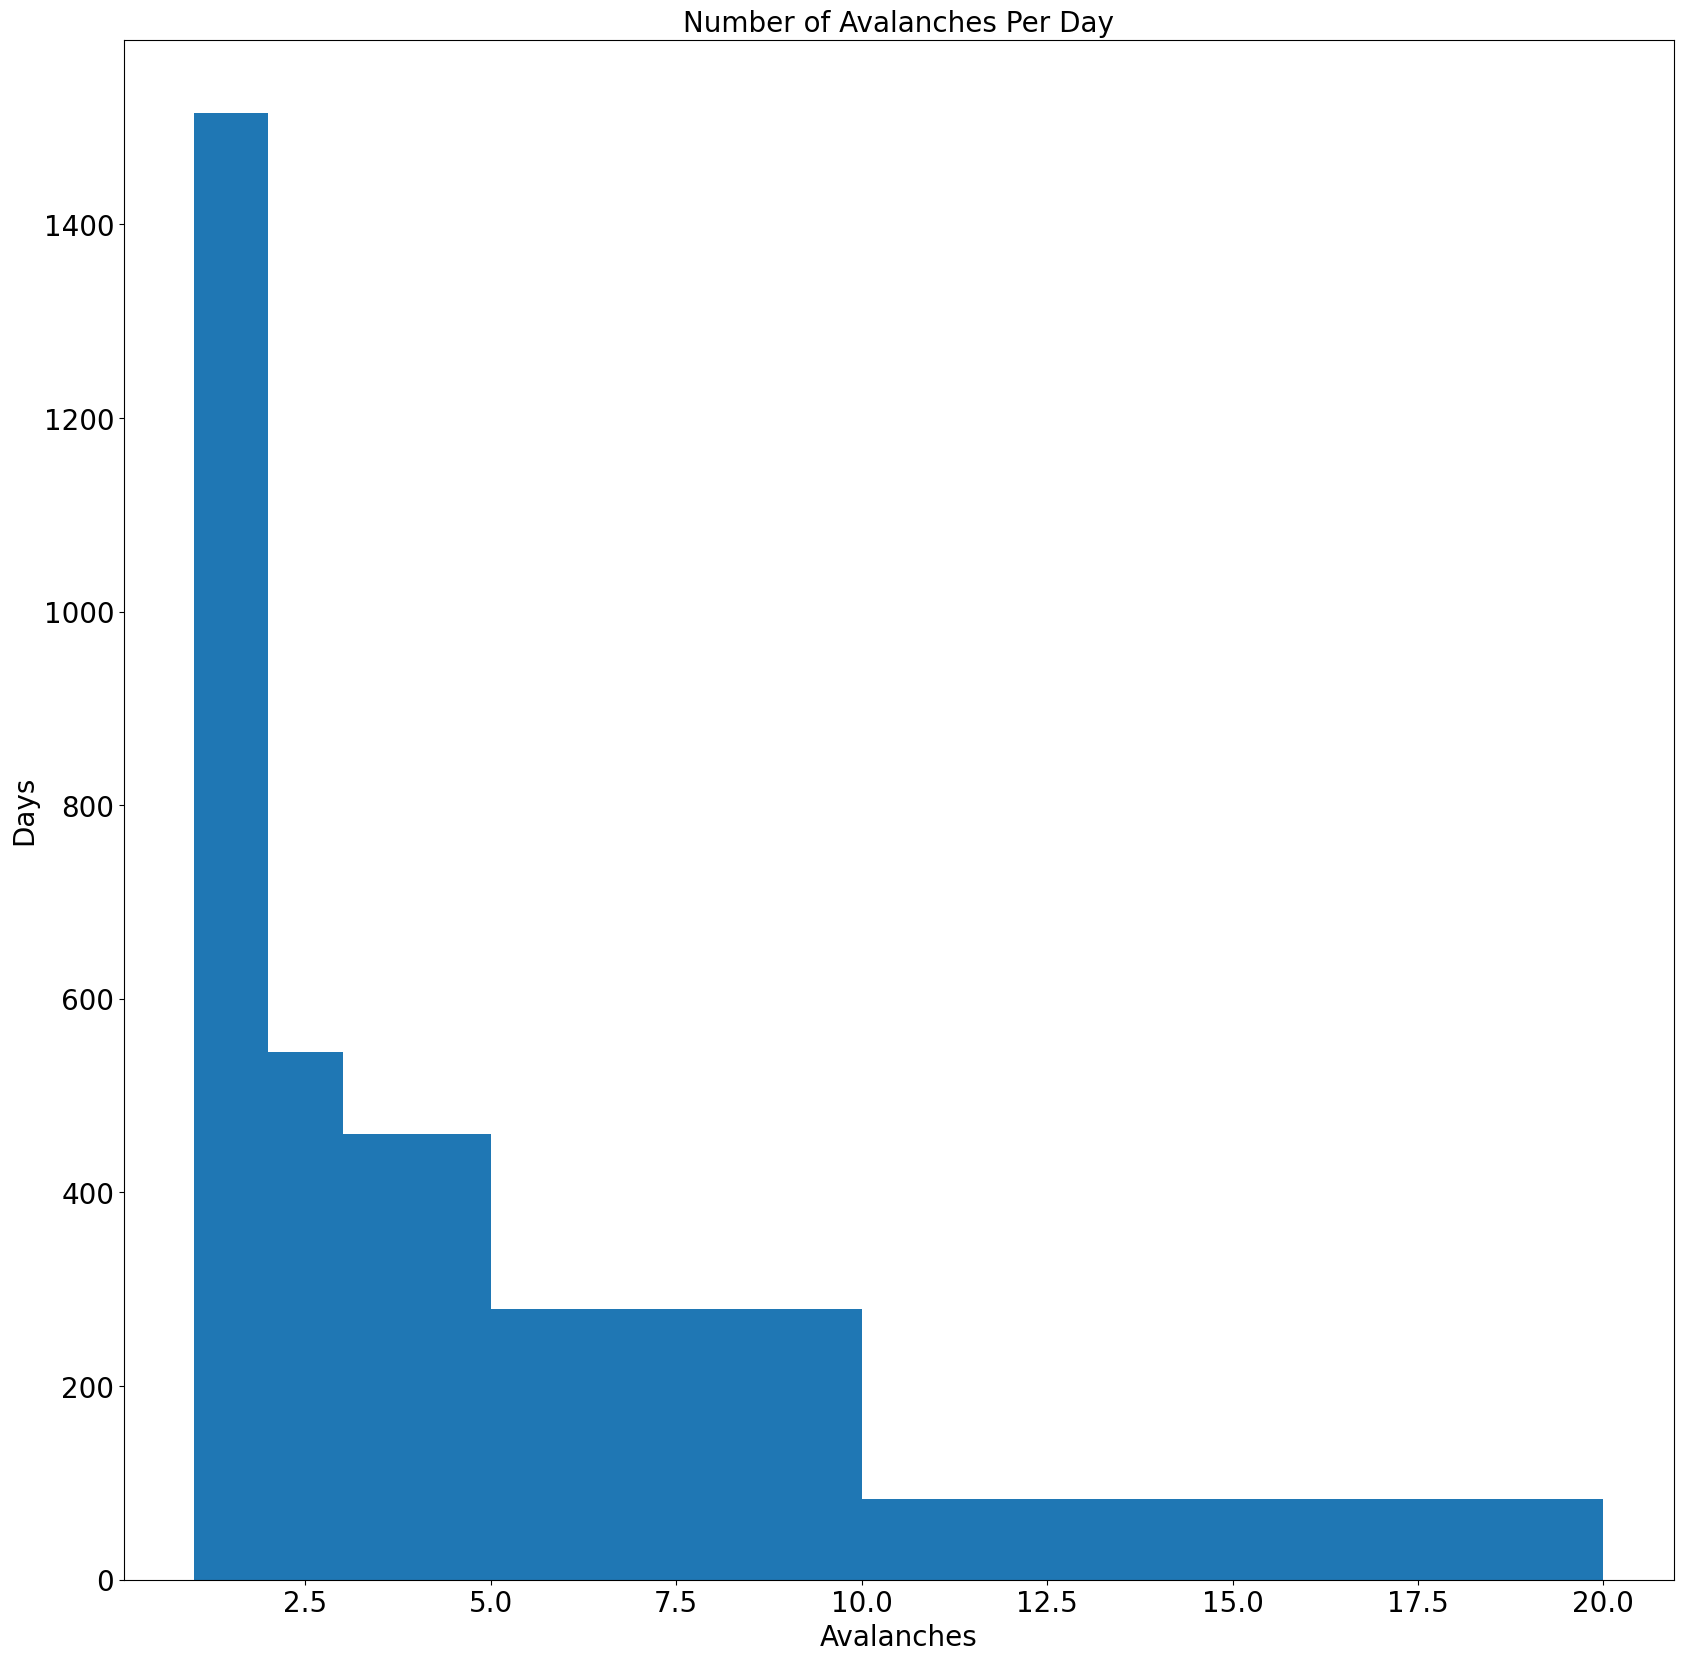

In [182]:
plots()

In [228]:
def days():
    date = df["DATE"]
    date = date[date > "2020-01-01"]
    dates_2021 = date[date < "2020-01-31"]
    
#     dates_2021_jan = date.str.startswith('2020-01', na=False)
    short_df = df.copy(deep=True)
    short_df = df.loc[dates_2021.index]
    
    avalanches_2021 = df["avalanche_sum"][dates_2021.index]
    avalanches_2021 = (avalanches_2021-avalanches_2021.mean())/avalanches_2021.std()
    
    precip_2021 = df["PRCP"][dates_2021.index]
    precip_2021 = (precip_2021-precip_2021.mean())/precip_2021.std()
    
    plt.scatter(dates_2021, avalanches_2021, label="avalanches")
    plt.scatter(dates_2021, precip_2021, label="precipitation")
    plt.legend(loc="upper left")
    plt.show()

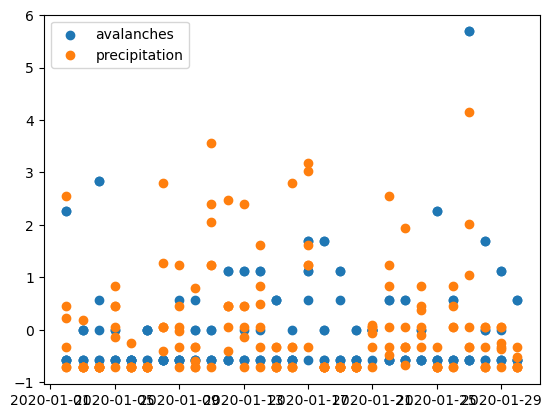

In [229]:
days()

In [246]:
def nathans_regress():
    df2 = df.copy(deep=True)
    df2 = df2[df2["Region_Salt Lake"] == 1]
    df2 = df2.drop(columns=["DATE", "Region_Salt Lake", "Region_Ogden",
                          "Region_Provo", "Region_Uintas"])
    df["const"] = 1
    """
    #drop winter months
    df_winter = df[df[["MONTH_1", ‘MONTH_2", ‘MONTH_3", #‘MONTH_4", ‘MONTH_5", ‘MONTH_6", ‘MONTH_10", ‘MONTH_11"
                       ‘MONTH_12"]].any(axis=1)]
    df_winter = df_winter.drop([‘MONTH_7", ‘MONTH_8", ‘MONTH_9", ‘MONTH_10"], axis=1)
    #drop all months
    df_winter = df_winter.drop(["MONTH_1", "MONTH_2", "MONTH_3", "MONTH_4", "MONTH_5",
                                "MONTH_6", "MONTH_11", "MONTH_12"], axis=1)
    df = df_winter
    """
    y_binary = df2["avalanche_binary"]
    y = df2["avalanche_sum"]
    df2 = df2.drop(columns=["avalanche_binary", "avalanche_sum"])
    X = df2
    model = sm.OLS(y, X.astype(float))
    res = model.fit().summary()
    print(res)

In [247]:
nathans_regress()

                            OLS Regression Results                            
Dep. Variable:          avalanche_sum   R-squared:                       0.236
Model:                            OLS   Adj. R-squared:                  0.234
Method:                 Least Squares   F-statistic:                     119.6
Date:                Wed, 17 Nov 2021   Prob (F-statistic):               0.00
Time:                        18:11:04   Log-Likelihood:                -16851.
No. Observations:                7751   AIC:                         3.374e+04
Df Residuals:                    7730   BIC:                         3.389e+04
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
PRCP                   1.7117      0

In [249]:
total_features = ['DATE', 'avalanche_sum', 'PRCP', 'SNWD', 'TMAX', 'TMIN', 'MONTH_1',
   'MONTH_10', 'MONTH_11', 'MONTH_12', 'MONTH_2', 'MONTH_3', 'MONTH_4',
   'MONTH_5', 'MONTH_6', 'MONTH_7', 'MONTH_8', 'MONTH_9', 'snow_diff_day',
   'snow_diff_week', 'got_snow', 'min_below_freezing',
   'max_above_freezing', 'min*max', 'avalanche_binary', 'Region_Ogden',
   'Region_Provo', 'Region_Salt Lake', 'Region_Uintas', 'const']

In [300]:
def confusion_matrix_sum():
    df_new = df.copy(deep=True)

    X_features = ['PRCP', 'SNWD', 'const']
    y_features = ['avalanche_sum']
    
    df_new['PRCP'] = (df_new['PRCP'] - df_new['PRCP'].mean()) / df_new['PRCP'].std()
    df_new['SNWD'] = (df_new['SNWD'] - df_new['SNWD'].mean()) / df_new['SNWD'].std()

    train_X, test_X, train_y, test_y = train_test_split(df_new[X_features], np.array(df_new[y_features].values).ravel(), test_size=.3)
    
    clf = LogisticRegression(max_iter=500).fit(train_X, train_y)
    predictions = clf.predict(test_X)
    
    confusion = confusion_matrix(y_true=test_y, y_pred=predictions)
    return confusion


In [301]:
confusion_matrix_sum()

array([[6485,   26,    3,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0],
       [ 449,   12,    4,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0],
       [ 153,    9,    2,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0],
       [  89,    2,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0],
       [  63,    3,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0],
       [  23,    0,    0,    1,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0],
       [  21,    0,   

In [306]:
def confusion_matrix_binary():
    df_new = df.copy(deep=True)
    
    X_features = ['PRCP', 'SNWD', 'const']
    y_features = ['avalanche_binary']
    
    df_new['PRCP'] = (df_new['PRCP'] - df_new['PRCP'].mean()) / df_new['PRCP'].std()
    df_new['SNWD'] = (df_new['SNWD'] - df_new['SNWD'].mean()) / df_new['SNWD'].std()

    train_X, test_X, train_y, test_y = train_test_split(df_new[X_features], np.array(df_new[y_features].values).ravel(), test_size=.3)
    
    clf = LogisticRegression(max_iter=500).fit(train_X, train_y)
    predictions = clf.predict(test_X)
    
    confusion = confusion_matrix(y_true=test_y, y_pred=predictions)
    return confusion


In [310]:
matrix = confusion_matrix_binary()
tn, fp, fn, tp = confusion_matrix_binary().ravel()
print("True Negative", tn)
print("False Positive", fp)
print("False Negative", fn)
print("True Positive", tp)
print(matrix)

True Negative 6397
False Positive 157
False Negative 720
True Positive 134
[[6393  153]
 [ 729  133]]
